In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Input, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
import cv2
import os
from sklearn.utils import shuffle

In [79]:
dataset_path = "C:\\Users\\ASLAM\\Desktop\\Bootcamp\\Day6\\digits"  

images = []
labels = []

for digit in range(10):
    folder_path = os.path.join("C:\\Users\\ASLAM\\Desktop\\Bootcamp\\Day6\\digits", str(digit))
    
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        if img is None:
            print(f"Skipping corrupt image: {img_path}")
            continue
        
        img = cv2.resize(img, (28, 28))  
        img = img / 255.0  
        images.append(img)
        labels.append(digit)


X = np.array(images).reshape(-1, 28*28)  
y = to_categorical(labels, num_classes=10)  

print(X.shape)  
print(y.shape)



(10160, 784)
(10160, 10)


In [80]:
X, y = shuffle(X, y, random_state=42)

In [ ]:
model = Sequential([
    Dense(10, activation='softmax', input_shape=(784,)) 
])

In [82]:
model.compile(optimizer=RMSprop(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [83]:
history=model.fit(X,y,epochs=10,validation_split=0.2)

Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5407 - loss: 1.4853 - val_accuracy: 0.8986 - val_loss: 0.4504
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8929 - loss: 0.4351 - val_accuracy: 0.9070 - val_loss: 0.3292
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9183 - loss: 0.3141 - val_accuracy: 0.9281 - val_loss: 0.2545
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9251 - loss: 0.2674 - val_accuracy: 0.9395 - val_loss: 0.2135
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9344 - loss: 0.2291 - val_accuracy: 0.9395 - val_loss: 0.1974
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9384 - loss: 0.2052 - val_accuracy: 0.9390 - val_loss: 0.1898
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9450 - loss: 0.1882 - val_accuracy: 0.9454 - val_loss: 0.1850
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9458 - loss: 0.1856 - val_accuracy: 0.

Text(0.5, 1.0, 'Loss Curve')

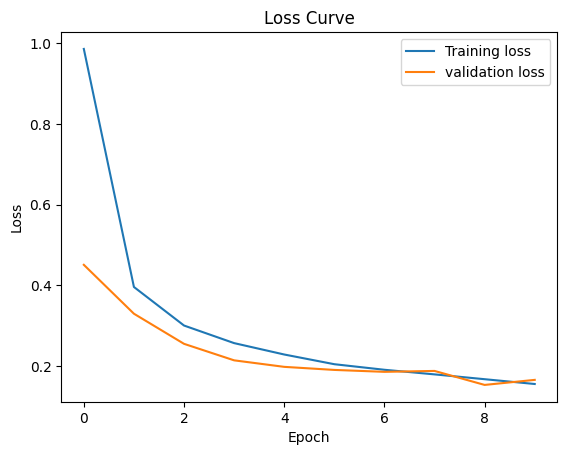

In [84]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

Text(0.5, 1.0, 'Accuracy Curve')

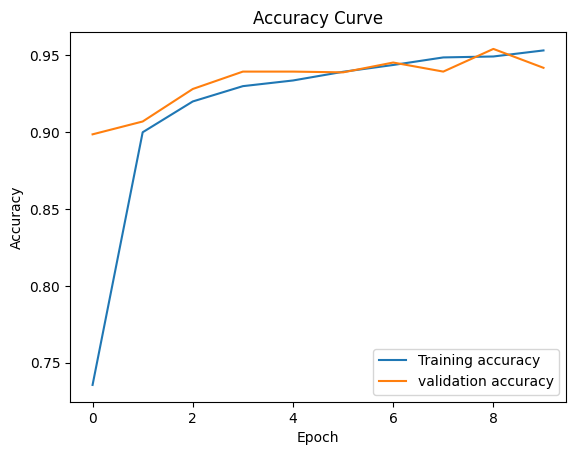

In [85]:
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')